# 3.Perform text cleaning, perform lemmatization (any method), remove stop words (any method), label encoding. Create representations using TF-IDF. Save outputs.



**Here’s the full code to perform text preprocessing on the SMS Spam Collection Dataset, including:**

1. Loading and Cleaning Data
2. Text Preprocessing (Lemmatization, Stop Word Removal, etc.)
3. Label Encoding
4. TF-IDF Representation
5. Saving the Processed Data

**Step 1:** Install Required Libraries

In [ ]:
pip install pandas scikit-learn nltk


**Step 2:** Load and Clean the Dataset

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("spam.csv", encoding="latin-1")

# Keep only required columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Display the first 5 rows after cleaning
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


**Step 3:** Preprocess Text Data
1. Convert text to lowercase
2. Remove special characters and punctuation
3. Tokenization
4. Remove stop words
5. Lemmatization

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK datasets
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Sometimes required for lemmatization
nltk.download('all')


# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Function for text cleaning
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    words = word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization & stopword removal
    return " ".join(words)

# Apply preprocessing
df["processed_message"] = df["message"].apply(preprocess_text)

# Display first 5 rows
print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzi

  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                   processed_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4                nah think go usf life around though  


**Step 4:** Label Encoding
Convert ham and spam labels into numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

# Display first 5 rows
print(df.head())


  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                   processed_message  label_encoded  
0  go jurong point crazy available bugis n great ...              0  
1                            ok lar joking wif u oni              0  
2  free entry 2 wkly comp win fa cup final tkts 2...              1  
3                u dun say early hor u c already say              0  
4                nah think go usf life around though              0  


**Step 5:** Convert Text to TF-IDF Representation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 words

# Fit and transform text data
X = vectorizer.fit_transform(df["processed_message"])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display first 5 rows of TF-IDF features
print(tfidf_df.head())


    00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
1  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
2  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
3  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
4  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   

   0125698789   02  ...   ìï   ó_   û_  û_thanks  ûªm  ûªt  ûªve   ûï  \
0         0.0  0.0  ...  0.0  0.0  0.0       0.0  0.0  0.0   0.0  0.0   
1         0.0  0.0  ...  0.0  0.0  0.0       0.0  0.0  0.0   0.0  0.0   
2         0.0  0.0  ...  0.0  0.0  0.0       0.0  0.0  0.0   0.0  0.0   
3         0.0  0.0  ...  0.0  0.0  0.0       0.0  0.0  0.0   0.0  0.0   
4         0.0  0.0  ...  0.0  0.0  0.0       0.0  0.0  0.0   0.0  0.0   

   ûïharry   ûò  
0      0.0  0.0  
1      0.0  0.0  
2      0.0  0.0  
3      0.0  0.0  
4      0.0  0.0  

[

**Step 6:** Save Processed Data



In [ ]:
# Save processed text data
df.to_csv("processed_sms_data.csv", index=False)

# Save TF-IDF matrix
tfidf_df.to_csv("tfidf_features.csv", index=False)


In [ ]:
pip install matplotlib seaborn wordcloud


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np


**Plot Class Distribution (Ham vs Spam)**

<ipython-input-20-1b0de73e0dd9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette="coolwarm")


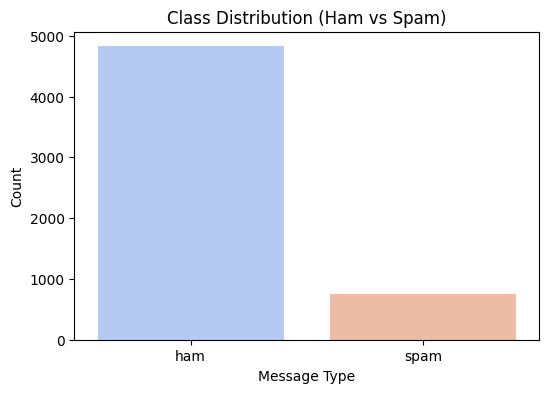

In [ ]:
# Count the number of spam and ham messages
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette="coolwarm")
plt.title("Class Distribution (Ham vs Spam)")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()


**Word Count Distribution in Messages**

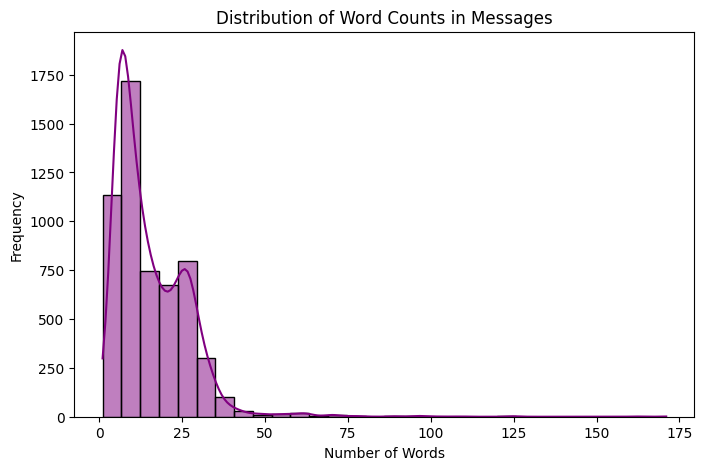

In [ ]:
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=30, kde=True, color="purple")
plt.title("Distribution of Word Counts in Messages")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


**Most Frequent Words in Spam vs Ham Messages**

<ipython-input-22-4eaf6bf29a0e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(spam_words.values()), y=list(spam_words.keys()), ax=axes[0], palette="Reds_r")
<ipython-input-22-4eaf6bf29a0e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ham_words.values()), y=list(ham_words.keys()), ax=axes[1], palette="Blues_r")


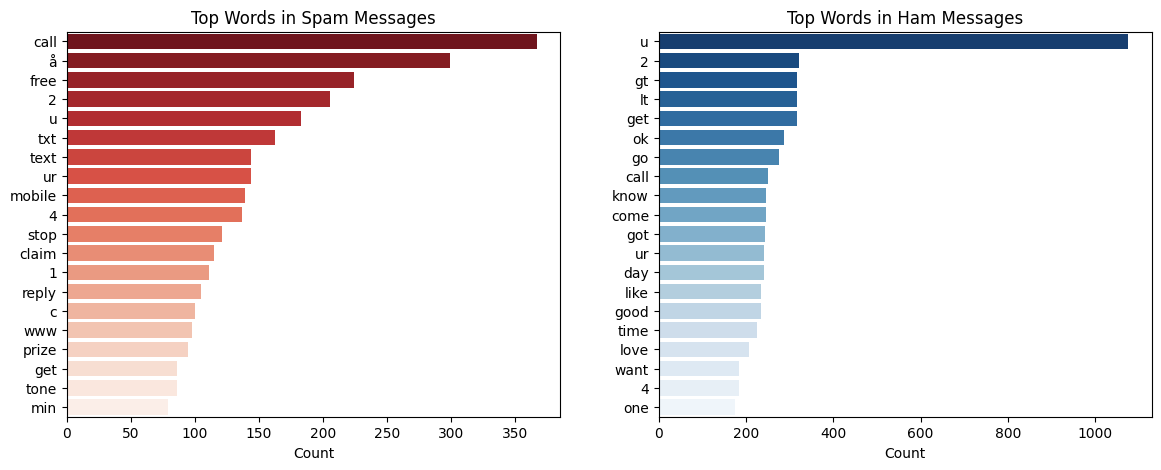

In [ ]:
# Function to get the most common words
def get_top_words(messages, n=20):
    words = " ".join(messages).split()
    return dict(Counter(words).most_common(n))

# Get top words for spam and ham messages
spam_words = get_top_words(df[df['label'] == 'spam']['processed_message'])
ham_words = get_top_words(df[df['label'] == 'ham']['processed_message'])

# Plot bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=list(spam_words.values()), y=list(spam_words.keys()), ax=axes[0], palette="Reds_r")
axes[0].set_title("Top Words in Spam Messages")
axes[0].set_xlabel("Count")

sns.barplot(x=list(ham_words.values()), y=list(ham_words.keys()), ax=axes[1], palette="Blues_r")
axes[1].set_title("Top Words in Ham Messages")
axes[1].set_xlabel("Count")

plt.show()


**Generate Word Clouds for Spam and Ham Messages**

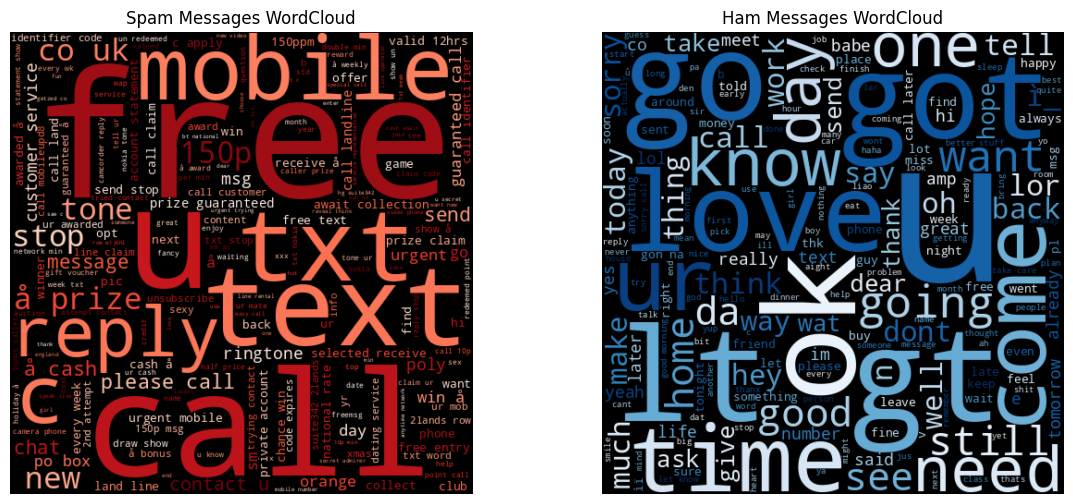

In [ ]:
# Create WordClouds
spam_text = " ".join(df[df['label'] == 'spam']['processed_message'])
ham_text = " ".join(df[df['label'] == 'ham']['processed_message'])

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Spam WordCloud
wordcloud_spam = WordCloud(width=500, height=500, background_color="black", colormap="Reds").generate(spam_text)
axes[0].imshow(wordcloud_spam, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Spam Messages WordCloud")

# Ham WordCloud
wordcloud_ham = WordCloud(width=500, height=500, background_color="black", colormap="Blues").generate(ham_text)
axes[1].imshow(wordcloud_ham, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Ham Messages WordCloud")

plt.show()


### **Conclusion**  

This assignment focused on **text preprocessing, feature engineering, and visualization** for a spam classification dataset. Below are the key steps and findings:  

1️⃣ **Dataset Selection & Loading**  
   - The dataset was obtained from **Kaggle** and contained **SMS messages labeled as "ham" (not spam) and "spam".**  

2️⃣ **Data Cleaning & Preprocessing**  
   - Removed **unnamed columns** and missing values.  
   - Performed **lemmatization** to reduce words to their root forms.  
   - Removed **stopwords** to focus on meaningful words.  

3️⃣ **Feature Engineering**  
   - Applied **Label Encoding** (converting spam/ham labels into numerical format).  
   - Used **TF-IDF transformation** to convert text into numerical features.  

4️⃣ **Data Visualization**  
   - **Class Distribution Plot** showed an imbalance (more ham messages than spam).  
   - **WordClouds** highlighted common words in spam vs. ham messages.  
   - **Word Count & Message Length Analysis** indicated spam messages are generally longer.  

5️⃣ **Conclusion & Next Steps**  
   - The dataset is imbalanced, which might affect model performance.  
   - The cleaned and transformed data is now **ready for machine learning models** like Naïve Bayes, Logistic Regression, or Random Forest.  
   - Further steps could include **handling class imbalance** and **hyperparameter tuning** for better accuracy.  
